In [1]:
from quspin.operators import hamiltonian # Hamiltonians and operators
from quspin.basis import spin_basis_1d # Hilbert space spin basis
import numpy as np # generic math functions
import matplotlib.pyplot as plt
%matplotlib inline

### Two level system : LZ problem

In [2]:
def Ham(tau, Delta):
    L=1 # system size
    def ramp(t):
        return 2*(t-1)/tau
    ramp_args=[]

    basis = spin_basis_1d(L)
    
    J_z = [[Delta,i] for i in range(L)]
    # static and dynamic lists
    static = [["z",J_z]]
    dynamic =[["x",J_z,ramp,ramp_args]]
    
    H = hamiltonian(static,dynamic,basis=basis,dtype=np.float_, check_symm=False, check_herm=False)
    return H

In [63]:
tau=10.0
Delta=2.0
H=Ham(tau, Delta)
print 'time=0 \n', H(time=0.0)
print 'time=1 \n', H(time=1.0)

time=0 
  (0, 0)	-2.0
  (0, 1)	-0.4
  (1, 0)	-0.4
  (1, 1)	2.0
time=1 
  (0, 0)	-2.0
  (1, 1)	2.0


In [22]:
def ramp(t,tau):
        return 2*(t-1)/tau

In [86]:
tau=2.0
tf=1.0+tau
ti=1.0 -tau
Delta=1.0
H=Ham(tau, Delta)
#psi0=V0[:,0] #ground state of t=0 hamiltonian
t_arr=np.linspace(ti,tf,20)
energy_gs=np.zeros(len(t_arr))
energy_es=np.zeros(len(t_arr))
for i in range(len(t_arr)):
    E,V=H.eigh(time=t_arr[i])
    energy_gs[i]=E[0]
    energy_es[i]=E[1]
    #print t_in[i],E0[0], E0[1]

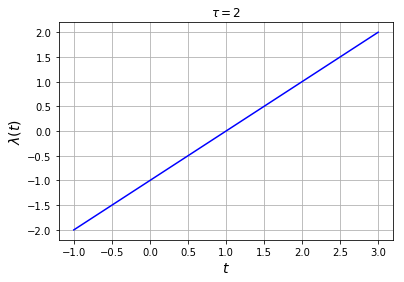

In [99]:
tau=2.0
plt.plot(t_arr, ramp(t_arr,tau), 'b-')#, label=r'$\Delta=1$')
plt.xlabel(r'$t$', fontsize=14)
plt.ylabel(r'$\lambda(t)$', fontsize=14)
plt.grid()
plt.title(r'$\tau=2$')
plt.savefig("lambda_LZ.eps")

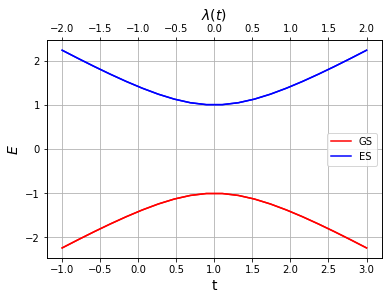

In [88]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(t_arr, energy_gs, 'r', label= 'GS')
ax1.plot(t_arr, energy_es, 'b', label= 'ES')
ax1.grid()
ax1.set_xlabel('t', fontsize=14)
ax1.set_ylabel(r'$E$', fontsize=14)
ax2 = ax1.twiny()

ax2.plot(ramp(t_arr,tau), energy_gs, 'r', label= 'GS')
ax2.plot(ramp(t_arr, tau), energy_es, 'b', label= 'ES')
ax2.set_xlabel(r'$\lambda(t)$', fontsize=14)
plt.legend(loc='best')
plt.savefig("energy_LZ.eps")

In [91]:
tau_arr_del1=np.logspace(-3,2,50)
Delta=1.0
fidelity_arr_del1=np.zeros(len(tau_arr_del1))
energy_es=np.zeros(len(tau_arr_del1))
for i in range(len(tau_arr_del1)):
    tau=tau_arr_del1[i]
    tf=1.0+tau
    ti=1.0 -tau
    tf=tau+1.0
    H=Ham(tau, Delta)
    E,V=H.eigh(time=ti)
    psi0=V[:,0] #ground state of t=ti hamiltonian
    psi = H.evolve(psi0,ti,tf) # evolution of time
    fidelity_arr_del1[i]=fidelity(tf,psi, H)

In [92]:
tau_arr_del2=np.logspace(-3,2,50)
Delta=2.0
fidelity_arr_del2=np.zeros(len(tau_arr_del2))
energy_es=np.zeros(len(tau_arr_del2))
for i in range(len(tau_arr_del2)):
    tau=tau_arr_del2[i]
    tf=1.0+tau
    ti=1.0 -tau
    tf=tau+1.0
    H=Ham(tau, Delta)
    E,V=H.eigh(time=ti)
    psi0=V[:,0] #ground state of t=ti hamiltonian
    psi = H.evolve(psi0,ti,tf) # evolution of time
    fidelity_arr_del2[i]=fidelity(tf,psi, H)

In [39]:
def fidelity(t,psi, Ham):
    energy,evector=Ham.eigh(time=t)
    psi_gs=evector[:,0]
    return np.abs(np.vdot(psi_gs,psi))**2

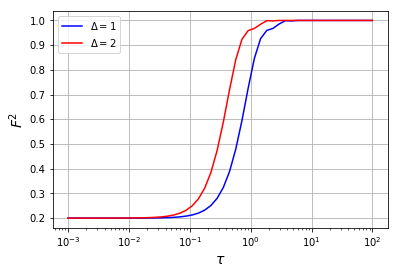

In [95]:
plt.semilogx(tau_arr_del1, fidelity_arr_del1, 'b-', label=r'$\Delta=1$')
plt.semilogx(tau_arr_del2, fidelity_arr_del2, 'r-', label=r'$\Delta=2$')
plt.xlabel(r'$\tau$', fontsize=14)
plt.ylabel(r'$F^2$', fontsize=14)
plt.grid()
plt.legend(loc='best')
plt.savefig("fidelity_LZ.eps")

### Two level system : rotating magnetic field

In [5]:
def Ham(tau, Delta):
    L=1 # system size
    def ramp(t):
        return 2*t/tau
    ramp_args=[]

    basis = spin_basis_1d(L)
    
    J_z = [[Delta,i] for i in range(L)]
    # static and dynamic lists
    static = [["z",J_z]]
    dynamic =[["x",J_z,ramp,ramp_args]]
    
    H = hamiltonian(static,dynamic,basis=basis,dtype=np.float_, check_symm=False, check_herm=False)
    return H

In [6]:
def fidelity(t,psi, Ham):
    energy,evector=Ham.eigh(time=t)
    psi_gs=evector[:,0]
    return np.abs(np.vdot(psi_gs,psi))**2

In [9]:
tau_arr_del1=np.logspace(-3,2,50)
Delta=1.0
fidelity_arr_del1=np.zeros(len(tau_arr_del1))
energy_es=np.zeros(len(tau_arr_del1))
for i in range(len(tau_arr_del1)):
    tau=tau_arr_del1[i]
    ti=-tau
    tf=tau
    H=Ham(tau, Delta)
    E,V=H.eigh(time=ti)
    psi0=V[:,0] #ground state of t=ti hamiltonian
    psi = H.evolve(psi0,ti,tf) # evolution of time
    fidelity_arr_del1[i]=fidelity(tf,psi, H)

In [10]:
tau_arr_del10=np.logspace(-3,2,50)
Delta=10.0
fidelity_arr_del10=np.zeros(len(tau_arr_del10))
energy_es=np.zeros(len(tau_arr_del10))
for i in range(len(tau_arr_del1)):
    tau=tau_arr_del10[i]
    ti=-tau
    tf=tau
    H=Ham(tau, Delta)
    E,V=H.eigh(time=ti)
    psi0=V[:,0] #ground state of t=ti hamiltonian
    psi = H.evolve(psi0,ti,tf) # evolution of time
    fidelity_arr_del10[i]=fidelity(tf,psi, H)

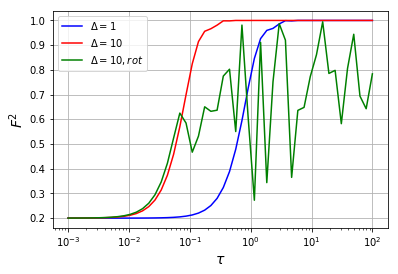

In [22]:
plt.semilogx(tau_arr_del1, fidelity_arr_del1, 'b-', label=r'$\Delta=1$')
plt.semilogx(tau_arr_del10, fidelity_arr_del10, 'r-', label=r'$\Delta=10$')
plt.semilogx(tau_arr_del10_rot, fidelity_arr_del10_rot, 'g-', label=r'$\Delta=10, rot$')
plt.xlabel(r'$\tau$', fontsize=14)
plt.ylabel(r'$F^2$', fontsize=14)
plt.grid()
plt.legend(loc='best')
#plt.savefig("fidelity_LZ.eps")

In [20]:
def Ham_LZ_rotating(tau, Delta):
    L=1 # system size
    def ramp(t):
        return 2*(t-tau)*np.cos(Delta*t)/tau
    ramp_args=[]

    basis = spin_basis_1d(L)
    
    J_z = [[Delta,i] for i in range(L)]
    # static and dynamic lists
    static = [["z",J_z]]
    dynamic =[["x",J_z,ramp,ramp_args]]
    
    H = hamiltonian(static,dynamic,basis=basis,dtype=np.float_, check_symm=False, check_herm=False)
    return H

In [21]:
tau_arr_del10_rot=np.logspace(-3,2,50)
Delta=10.0
fidelity_arr_del10_rot=np.zeros(len(tau_arr_del10))
energy_es=np.zeros(len(tau_arr_del10))
for i in range(len(tau_arr_del1)):
    tau=tau_arr_del10_rot[i]
    ti=0.0
    tf=2*tau
    H=Ham_LZ_rotating(tau, Delta)
    E,V=H.eigh(time=ti)
    psi0=V[:,0] #ground state of t=ti hamiltonian
    psi = H.evolve(psi0,ti,tf) # evolution of time
    fidelity_arr_del10_rot[i]=fidelity(tf,psi, H)

### Three level system : NV center problem

In [14]:
def Ham_NV(tau):
    L=1 # system size
    basis = spin_basis_1d(L, S='1', pauli=False)
    Delta=1.0
    J_z = [[Delta,i] for i in range(L)]
    # static and dynamic lists
    static_z = [["z",J_z]]
    dynamic_z =[]
    
    S_z = hamiltonian(static_z,dynamic_z,basis=basis,dtype=np.float_, check_symm=False, check_herm=False)
    
    def ramp(t):
        gamma_eff=2.8 *1e9/ (2*np.pi*1e9) # 1000 G magnetic field assumed
        return 0.5*gamma_eff*t/tau
    ramp_args=[]

    J_x = [[Delta,i] for i in range(L)]
    static_x = []
    dynamic_x =[["+",J_x,ramp,ramp_args], ["-",J_x,ramp,ramp_args]]
    
    S_x_t= 0.5*hamiltonian(static_x,dynamic_x,basis=basis,dtype=np.float_, check_symm=False, check_herm=False)
    H= Delta*S_z**2 + S_x_t
    return H

In [23]:
def fidelity(t,psi, Ham):
    energy,evector=Ham.eigh(time=t)
    psi_gs=evector[:,0]
    return np.abs(np.vdot(psi_gs,psi))**2

In [139]:
H(time=10.0).toarray()

array([[  1.        ,  12.72792206,   0.        ],
       [ 12.72792206,   0.        ,  12.72792206],
       [  0.        ,  12.72792206,   1.        ]])

In [15]:
def magnetic_field(t,tau):
        B= 1e3*0.5*t/tau
        return B

In [45]:
tau=2.0
tf=tau
ti=-tau
H=Ham_NV(tau)
#psi0=V0[:,0] #ground state of t=0 hamiltonian
t_arr=np.linspace(ti,tf,20)
energy_gs=np.zeros(len(t_arr))
energy_es=np.zeros(len(t_arr))
energy_2es=np.zeros(len(t_arr))
for i in range(len(t_arr)):
    E,V=H.eigh(time=t_arr[i])
    energy_gs[i]=E[0]
    energy_es[i]=E[1]
    energy_2es[i]=E[2]

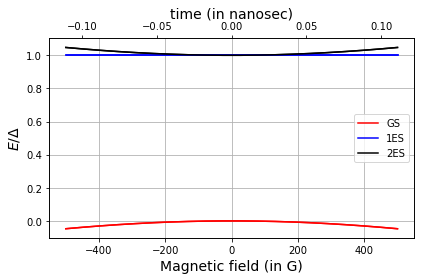

In [46]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(magnetic_field(t_arr, tau), energy_gs, 'r', label= 'GS')
ax1.plot(magnetic_field(t_arr, tau), energy_es, 'b', label= 'ES')
ax1.plot(magnetic_field(t_arr, tau), energy_2es, 'k', label= '2ES')
ax1.set_xlabel(r'Magnetic field (in G)', fontsize=14)
ax1.set_ylabel(r'$E/ \Delta$', fontsize=14)
ax1.grid()
pi=np.pi
ax2 = ax1.twiny()
ax2.plot(t_arr/(2*pi*2.87), energy_gs, 'r', label= 'GS')
ax2.plot(t_arr/(2*pi*2.87), energy_es, 'b', label= '1ES')
ax2.plot(t_arr/(2*pi*2.87), energy_2es, 'k', label= '2ES')
ax2.set_xlabel('time (in nanosec)', fontsize=14)
plt.legend(loc='best')
plt.tight_layout()
plt.savefig("energy_NV.eps")

In [41]:
tau_arr=np.logspace(-5,1,50)
fidelity_arr=np.zeros(len(tau_arr))
energy_es=np.zeros(len(tau_arr))
for i in range(len(tau_arr)):
    tau=tau_arr[i]
    tf=tau
    ti=-tau
    H=Ham_NV(tau)
    E,V=H.eigh(time=ti)
    psi0=V[:,0] #ground state of t=ti hamiltonian
    psi = H.evolve(psi0,ti,tf) # evolution of time
    fidelity_arr[i]=fidelity(tf,psi, H)
    #print tau, fidelity_arr[i]

In [37]:
tau_arr=np.logspace(-10,1,2)
fidelity_arr=np.zeros(len(tau_arr))
energy_es=np.zeros(len(tau_arr))
for i in range(len(tau_arr)):
    tau=tau_arr[i]
    tf=tau
    ti=-tau
    H=Ham_NV(tau)
    E,V=H.eigh(time=ti)
    psi0=V[:,0] #ground state of t=ti hamiltonian
    psi = H.evolve(psi0,ti,tf) # evolution of time
    fidelity_arr[i]=fidelity(tf,psi, H)
    print tau, fidelity_arr[i]

1e-10 0.834313986035
10.0 0.99933754246


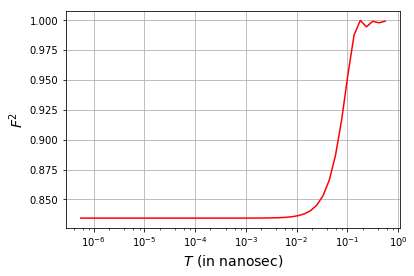

In [43]:
plt.semilogx(tau_arr/(2*np.pi*2.87), fidelity_arr, 'r-')#, label=r'$\Delta=2$')
plt.xlabel(r'$T$ (in nanosec)', fontsize=14)
plt.ylabel(r'$F^2$', fontsize=14)
plt.grid()
#plt.legend(loc='best')
plt.savefig("fidelity_NV_expt.eps")

### Time-dependent three level system : NV center problem

In [143]:
def Ham_NV_t():
    L=1 # system size
    basis = spin_basis_1d(L, S='1', pauli=False)
    Delta=1.0
    J_z = [[Delta,i] for i in range(L)]
    # static and dynamic lists
    static_z = [["z",J_z]]
    dynamic_z =[]
    
    S_z = hamiltonian(static_z,dynamic_z,basis=basis,dtype=np.float_, check_symm=False, check_herm=False)
    
    def ramp(t):
        gamma_eff=1.0
        return gamma_eff*np.cos(t)
    ramp_args=[]

    J_x = [[Delta,i] for i in range(L)]
    static_x = []
    dynamic_x =[["+",J_x,ramp,ramp_args], ["-",J_x,ramp,ramp_args]]
    
    S_x_t= 0.5*hamiltonian(static_x,dynamic_x,basis=basis,dtype=np.float_, check_symm=False, check_herm=False)
    H= Delta*S_z**2 + S_x_t
    return H

In [144]:
H=Ham_NV_t()
print H(time=0).toarray()
print H(time= np.pi*2).toarray()

[[ 1.          0.70710678  0.        ]
 [ 0.70710678  0.          0.70710678]
 [ 0.          0.70710678  1.        ]]
[[ 1.          0.70710678  0.        ]
 [ 0.70710678  0.          0.70710678]
 [ 0.          0.70710678  1.        ]]


In [128]:
print H(time=0.0).toarray()
print H(time=2 *np.pi).toarray()
print np.cos(2 *np.pi)

[[ 1.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  1.]]
[[ 1.          0.98994949  0.        ]
 [ 0.98994949  0.          0.98994949]
 [ 0.          0.98994949  1.        ]]
1.0


In [141]:
#tau=2.0
T=1.0
ti=0
tf=20.0
H=Ham_NV_t()
#psi0=V0[:,0] #ground state of t=0 hamiltonian
t_arr=np.linspace(ti,tf,1000)
energy_gs=np.zeros(len(t_arr))
energy_es=np.zeros(len(t_arr))
energy_2es=np.zeros(len(t_arr))
for i in range(len(t_arr)):
    E,V=H.eigh(time=t_arr[i])
    energy_gs[i]=E[0]
    energy_es[i]=E[1]
    energy_2es[i]=E[2]

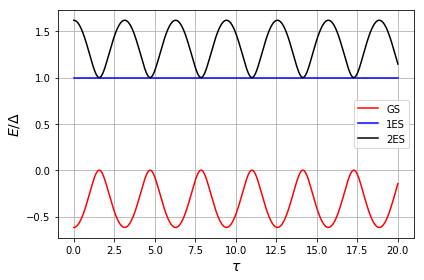

In [146]:
plt.grid()
plt.plot(t_arr, energy_gs, 'r', label= 'GS')
plt.plot(t_arr, energy_es, 'b', label= '1ES')
plt.plot(t_arr, energy_2es, 'k', label= '2ES')
plt.xlabel(r'$\tau$ ', fontsize=14)
plt.ylabel(r'$E/ \Delta$', fontsize=14)
plt.legend(loc='best')
plt.tight_layout()
plt.savefig("energy_NV_cosine.eps")